### Author - Mohammmed Ramees
### GRIP - The Sparks Foundation
### Data Science and Business Analytics internship (April 2021)
# Exploratory Data Analysis - Retail

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading data

url = 'https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
retail = pd.read_csv(path)

In [3]:
retail.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
retail.shape

(9994, 13)

In [5]:
retail.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
#check for unique values in data

retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
#check for null values
retail.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
#remove redundant values
data = retail.drop(['Postal Code'], axis =1)

In [9]:
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Univariate analysis
Univariate analysis explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own.

### Analysis on segment of buyers

In [10]:
data['Segment'].value_counts()/ len(data['Segment'])*100

Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: Segment, dtype: float64

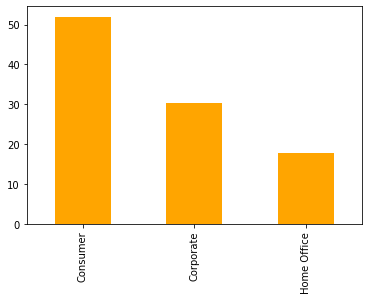

In [11]:
barplot = (data['Segment'].value_counts()/ len(data['Segment'])*100).plot(kind ='bar', color = 'orange')

#### Conclusions made from the graph:

1.around 50% of people belong to consumer segment.

2.around 30% of people belong to corporate segment.

3.around 15-20% people belong to home office segment.

#### Analysis of shipment mode

In [12]:
sm = data['Ship Mode'].value_counts()
sm = sm.to_frame().reset_index()
sm.columns= ['Ship Mode','Count']
sm

,Ship Mode,Count
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


In [13]:
SM = data['Ship Mode'].value_counts()/ len(data['Ship Mode'])*100
SM

Standard Class    59.715829
Second Class      19.461677
First Class       15.389234
Same Day           5.433260
Name: Ship Mode, dtype: float64

<AxesSubplot:>

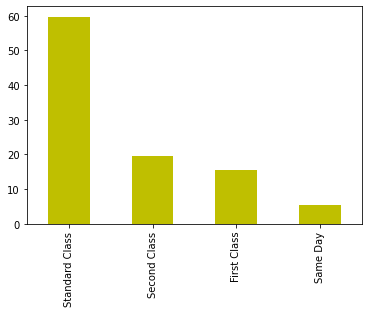

In [14]:
SM.plot(kind ='bar', color='y')

#### Conclusions made from graph:

Maximum shipment mode is by standard class.

10-20% of deliveries made by second and first class.

around 5% deliveries were made on the same day.

#### Analysis of region

In [15]:
R = data['Region'].value_counts()/ len(data['Region'])*100
R

West       32.049230
East       28.497098
Central    23.243946
South      16.209726
Name: Region, dtype: float64

<AxesSubplot:>

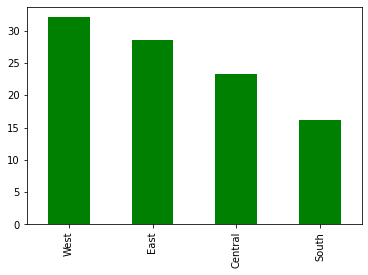

In [16]:
R.plot(kind ='bar', color='green')

#### Conclusions from graph:

25-35% of sales is from western and Eastern states of the US

23% sales from central US

16% sales from Southern states

#### Analysis of category of items in store

In [17]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:>

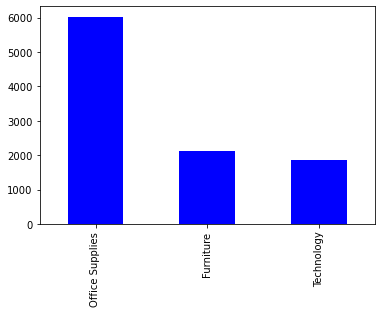

In [18]:
Cat =  data['Category'].value_counts()
Cat.plot(kind='bar', color='blue')

#### Conclusions from graph:

Most of the supplies belongs to Office Supplies category

1000-2000 supplies belongs to Furniture and Technology categories

#### Graph for sub-category items

<AxesSubplot:>

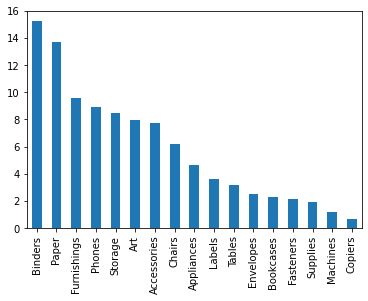

In [19]:
(data['Sub-Category'].value_counts()/len(data['Sub-Category'])*100).plot(kind='bar')

#### Analysis of sales in each state

<AxesSubplot:>

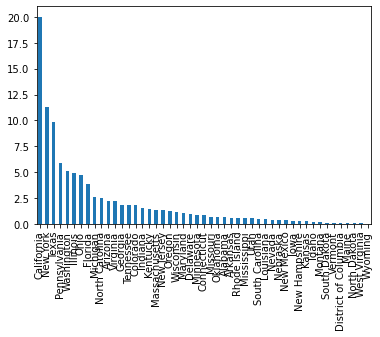

In [20]:
(data['State'].value_counts()/len(data['State'])*100).plot(kind='bar')

#### Conclusions from graph:

Maximum sales is from California, followed by New York and Texas

Least sales is from South Dakota, Vermont, District of Columbia, Maine, North Dakot, West Virginia and Wyoming with less than 1% sales

## Bivariate Analysis
Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.

#### Relationship between Sales and Profit for each Segment

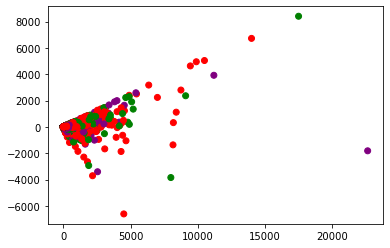

In [21]:
fig, ax = plt.subplots()
colors = {'Consumer':'red', 'Corporate':'green', 'Home Office':'purple'}
ax.scatter(data['Sales'],data['Profit'],c = data['Segment'].apply(lambda x: colors[x]))
plt.show()

Observation : most profit is from Consumer segement

#### Discount vs profit

In [22]:
dp = data.pivot_table(values='Profit', index='Segment', columns='Discount',aggfunc='median')
dp

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,16.1240,62.0390,5.12940,6.0433,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.7175
Corporate,16.2688,46.7908,26.27735,6.7054,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.3800
Home Office,15.4546,37.2300,16.79860,7.2576,-18.2040,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.0328


#### Observations:

From the pivot table it is seen that store is undergoing a loss when discount above 30% is offered

For discount 0-20%, there is profit
#### Sales by Segment and Category

In [23]:
ssc = data.groupby(["Segment", "Category"])["Sales"].agg(["sum"]).sort_values(by = "sum", ascending = False)
ssc

sum
Segment     Category                    
Consumer    Technology       406399.8970
            Furniture        391049.3120
            Office Supplies  363952.1360
Corporate   Technology       246450.1190
            Office Supplies  230676.4620
            Furniture        229019.7858
Home Office Technology       183304.0170
            Office Supplies  124418.4340
            Furniture        121930.6975

<AxesSubplot:xlabel='Segment'>

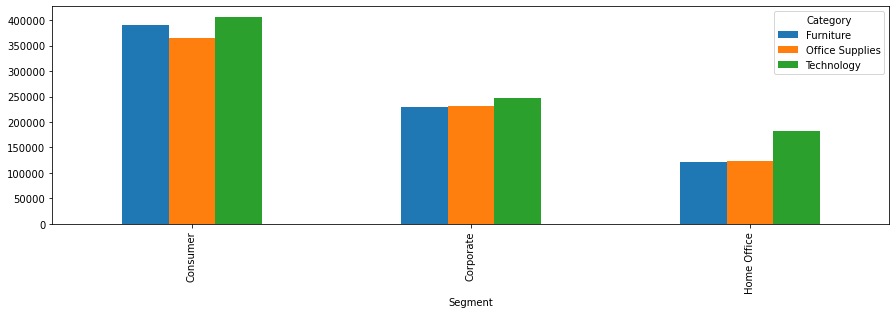

In [24]:
barplot=pd.pivot_table(ssc,values='sum',index='Segment',columns='Category')
barplot.plot.bar(figsize = (15, 4))

#### Conclusions:

Sales of technology,furniture and office supplies for Consumer segment is more than that of Corporate and Home Office segments.

From graph it is also clear that sales of technology in each segment is greater than sales of furniture and office supply.

#### Profit to sales ratio by segments

In [25]:
pr = data.groupby("Segment")[["Profit"]].agg(["sum"]).reset_index()
pr = pr.droplevel(1, axis = 1)
pr = pr.melt("Segment", var_name = "Business", value_name = "prof")
sa = data.groupby("Segment")[["Sales"]].agg(["sum"]).reset_index()
sa = sa.droplevel(1, axis = 1)
sa = sa.melt("Segment", var_name = "Business", value_name = "sale")
pr.merge(sa, left_on='Segment', right_on='Segment')
pr["profit to sales"] = pr["prof"] / sa["sale"]*100
pr

,Segment,Business,prof,profit to sales
0,Consumer,Profit,134119.2092,11.548050
1,Corporate,Profit,91979.1340,13.025506
2,Home Office,Profit,60298.6785,14.034269


<AxesSubplot:xlabel='Segment'>

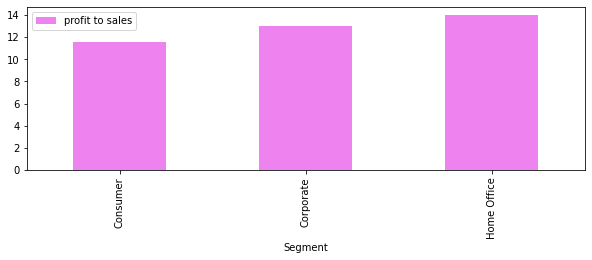

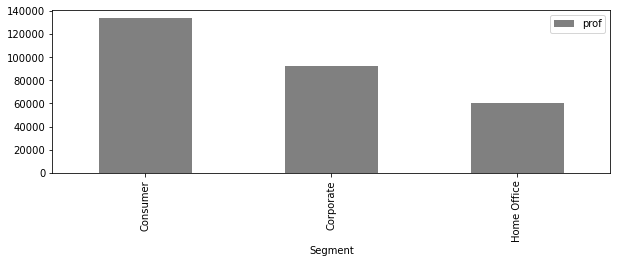

In [42]:
barplot=pd.pivot_table(pr,values='profit to sales',index='Segment')
barplot.plot.bar(figsize = (10, 3),  color='violet')
barplot=pd.pivot_table(pr,values='prof',index='Segment')
barplot.plot.bar(figsize = (10, 3),  color='grey')

#### Conclusions:
Profit to sales ratio is high in home office but sales in this segment is too low

The company should try to increase sales on home office segment

#### Total sales and profit

In [27]:
ss = data['Sales'].sum()
ps = data['Profit'].sum()
print("Total sales is", (ss),"$")
print("Total profit is", (ps),"$")

Total sales is 2297200.8603 $
Total profit is 286397.0217 $
